In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from shutil import copyfile
import zipfile
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

!python --version

Python 3.9.6


In [4]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [3]:
# List all available physical devices
physical_devices = tf.config.list_physical_devices()
print("Available physical devices:", physical_devices)

# Specifically check for GPU availability
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    print(f"GPU is available: {gpus}")
else:
    print("GPU is not available.")

Available physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:

# Define root directory
root_dir = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/train_valid_split'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path, 'training'))
    os.makedirs(os.path.join(f'{root_path}/training', 'dogs'))
    os.makedirs(os.path.join(f'{root_path}/training', 'cats'))
    os.makedirs(os.path.join(root_path, 'testing'))
    os.makedirs(os.path.join(f'{root_path}/testing', 'dogs'))
    os.makedirs(os.path.join(f'{root_path}/testing', 'cats')) 

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")


In [5]:

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))


/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/train_valid_split/training
/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/train_valid_split/testing
/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/train_valid_split/training/dogs
/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/train_valid_split/training/cats
/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/train_valid_split/testing/dogs
/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/train_valid_split/testing/cats


In [6]:

len(os.listdir('/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/PetImages/Cat'))


12501

In [7]:

len(os.listdir("/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/PetImages/Dog"))


12501

In [23]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  # Shuffle list
  shuffled_source = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))

  # Find total number of files in training dir
  training_number = int(len(shuffled_source) * SPLIT_SIZE)
  i = 0
  target = TRAINING

  for item in shuffled_source:
    item_source = os.path.join(SOURCE, item)
    if os.path.getsize(item_source) == 0:
      print(f'{item} is zero length, so ignoring.')
    else: 
      copyfile(item_source, os.path.join(target, item))
      i += 1

    # Switch copy target to TESTING
    if i == training_number:
      target = TESTING


In [9]:
os.getcwd()

'/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs'

In [11]:

# Define paths
CAT_SOURCE_DIR = "/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/PetImages/Cat/"
DOG_SOURCE_DIR = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/PetImages/Dog/'

TRAINING_DIR = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/train_valid_split/training/'
TESTING_DIR = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/train_valid_split/testing/'

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")


# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")


666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


In [12]:

11250+11250


22500

In [13]:
1250+1250

2500

In [2]:
TRAINING_DIR = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/train_valid_split/training/'

In [3]:
TESTING_DIR = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/train_valid_split/testing/'

In [4]:
from tensorflow.keras.preprocessing.image import load_img
def sample_and_display_images(image_directory, sample_size):
    image_paths = [os.path.join(image_directory, filename)
                   for filename in os.listdir(image_directory)
                   if filename.endswith('.jpg')]  # Filter for .png files

    if len(image_paths) < sample_size:
        print(f"Warning: Not enough images in {image_directory} to sample {sample_size}.")
        sample_size = len(image_paths)  # Sample all available images

    sample_images = random.sample(image_paths, sample_size)

    # Display the sampled images
    for image_path in sample_images:
        image = load_img(image_path)
        plt.imshow(image)
        plt.title(image_path)  # Add the image path as the title for reference
        plt.show()


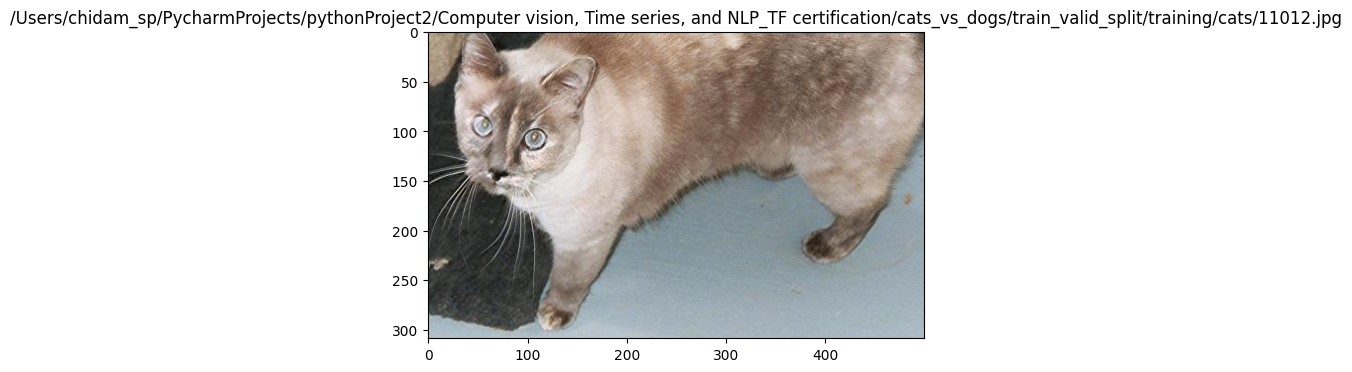

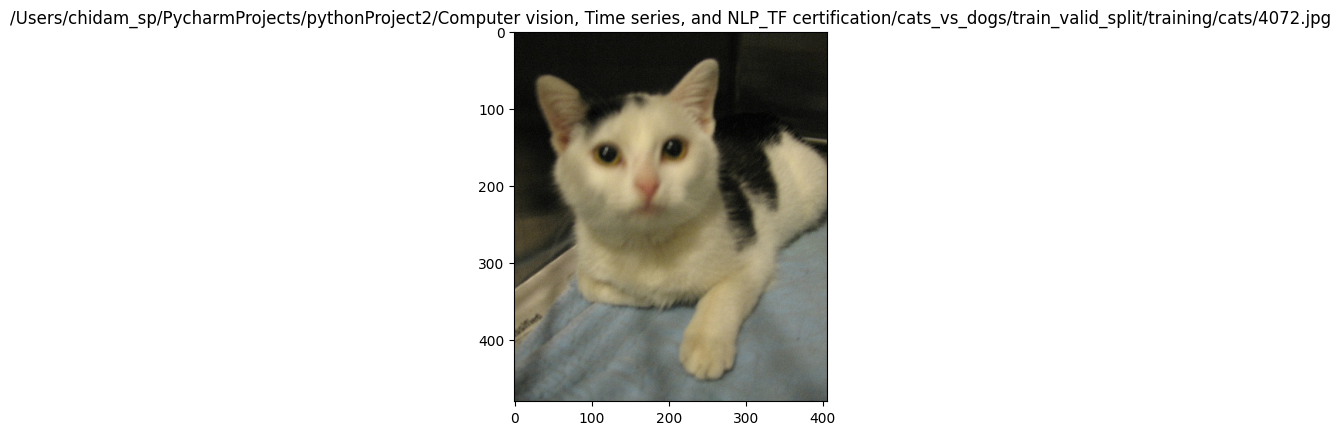

In [5]:

train_image_directory = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/train_valid_split/training/cats'
sample_and_display_images(train_image_directory, 2)


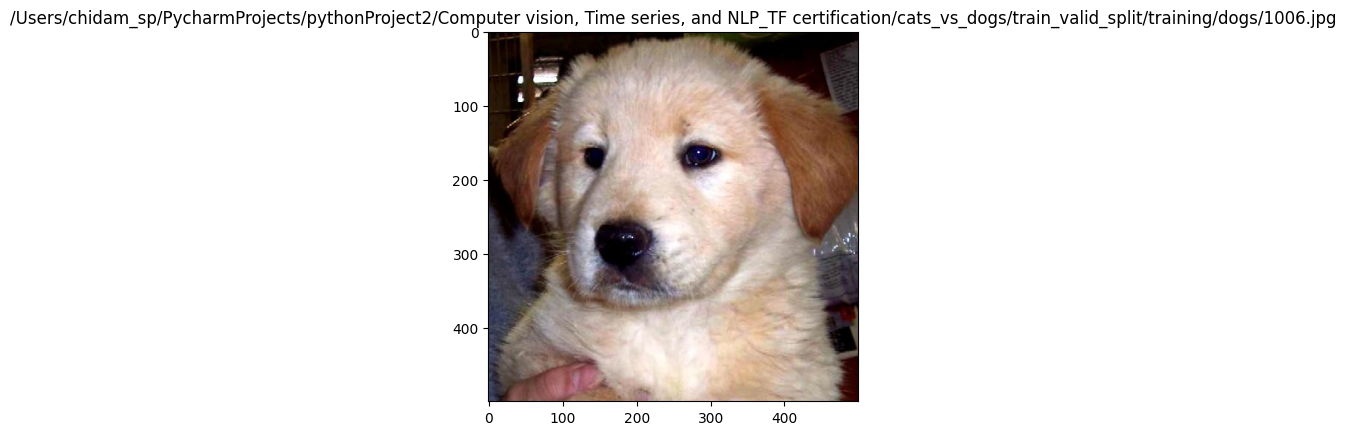

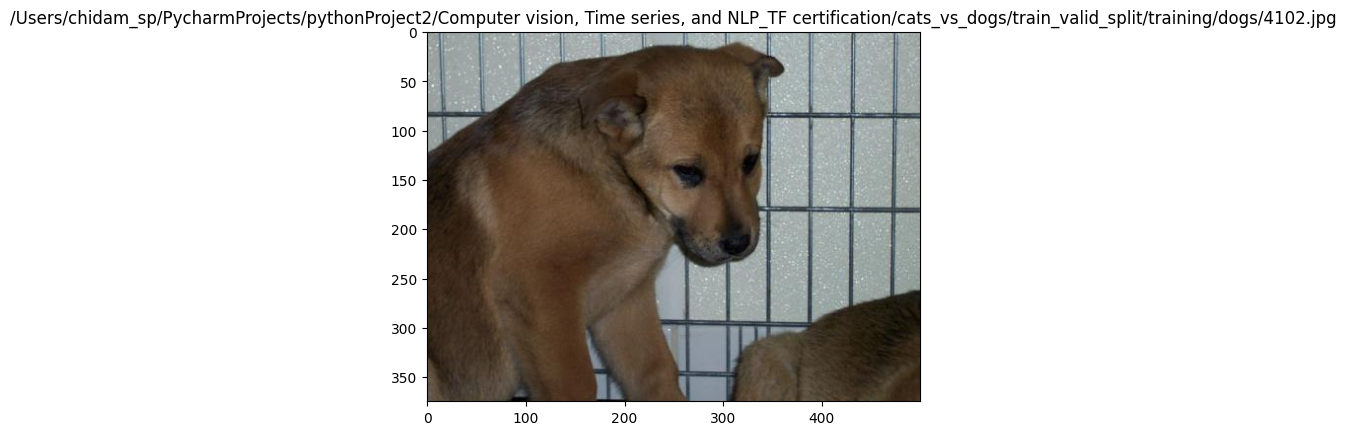

In [6]:

train_image_directory = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/train_valid_split/training/dogs'
sample_and_display_images(train_image_directory, 2)


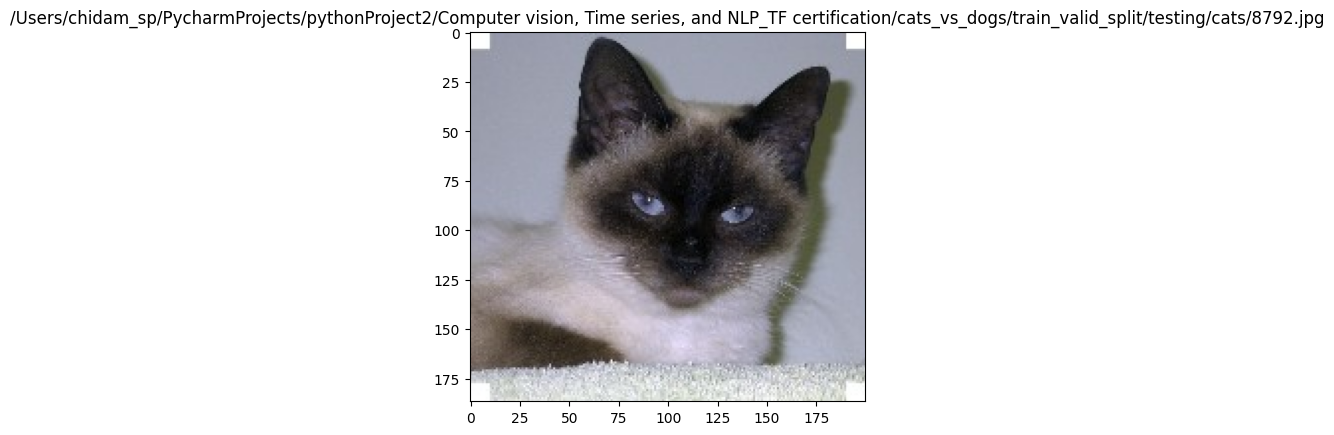

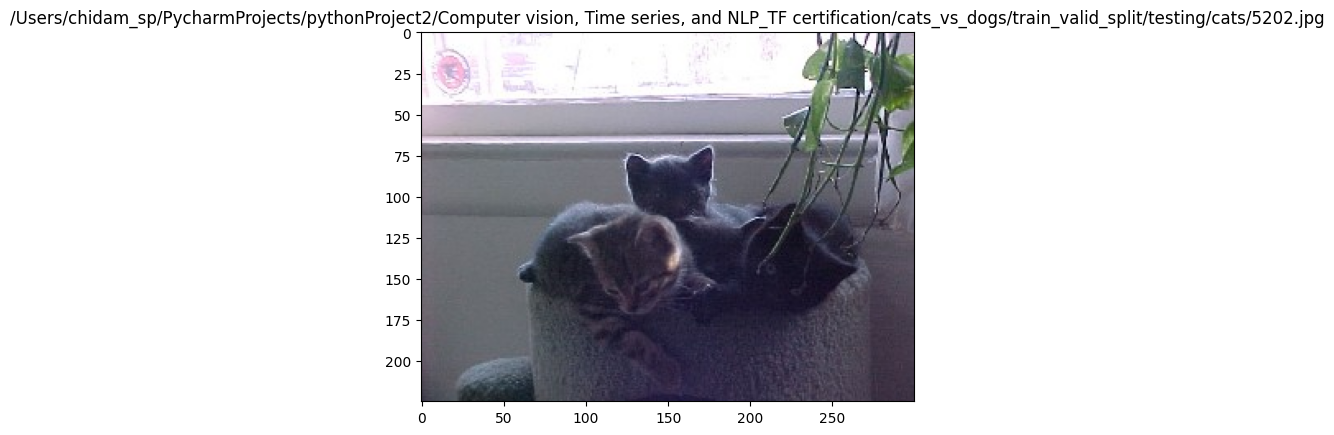

In [7]:

train_image_directory = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/train_valid_split/testing/cats'
sample_and_display_images(train_image_directory, 2)


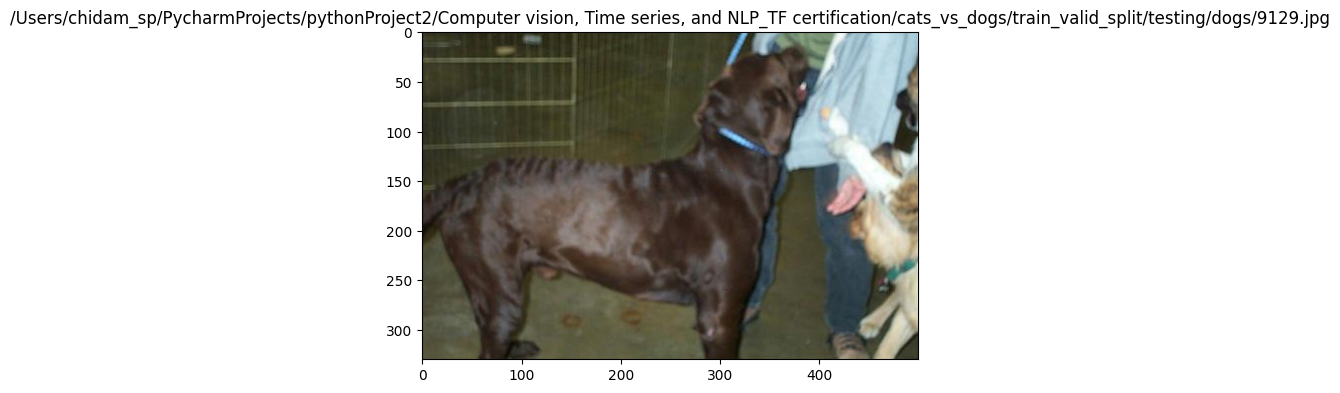

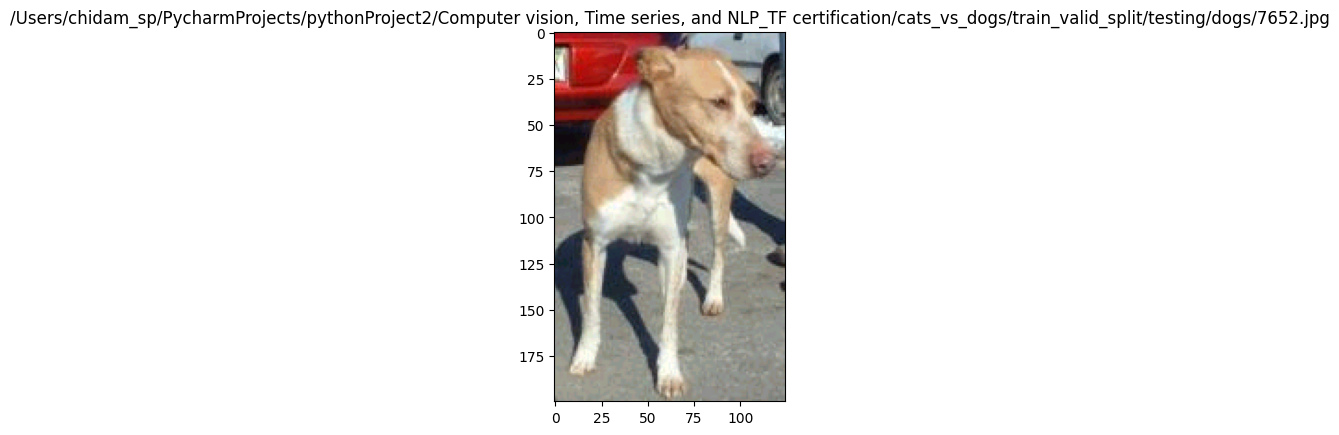

In [8]:

train_image_directory = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/train_valid_split/testing/dogs'
sample_and_display_images(train_image_directory, 2)


In [10]:
del history, model_training, train_val_generators, model_build

In [31]:
22498//292

77

In [25]:

2500//32


78

## Training step

In [11]:

def train_val_generators(TRAINING_DIR, TESTING_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                       rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode='nearest')


    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR, 
                                                        batch_size=292, class_mode='binary', target_size=(150, 150))
    # save_to_dir=/tmp/img-data-gen-outputs
    
    validation_datagen = ImageDataGenerator(rescale=1./255)
    
    validation_generator = validation_datagen.flow_from_directory(directory=TESTING_DIR, 
                                                                  batch_size=78, class_mode='binary', target_size=(150, 150))
    
    return train_generator, validation_generator

def model_build():
    tf.random.set_seed(123)
    random.seed(123)
    np.random.seed(123)
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        # tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),    
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

#How to set up a CV loop for a computer vision problem?

def model_training(EPOCHS, model_checkpoint_path, patience):
    import datetime
    start_time = datetime.datetime.now()
    train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)
    callbacks = myCallback()
    model = model_build()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=patience,
                                                mode='min')
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_checkpoint_path, monitor='val_loss', mode='min', save_best_only=True)
    history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, verbose=1, callbacks=[callbacks, early_stopping, model_checkpoint])
    end_time = datetime.datetime.now()
    print("Training time: ", end_time - start_time)
    return history


In [12]:

model_checkpoint_path = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/conv2d_stacked_model.h5'
history = model_training(15, model_checkpoint_path, 5)


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Epoch 1/15


2024-05-30 19:33:27.645526: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


78/78 [==============================] - 59s 735ms/step - loss: 0.6830 - accuracy: 0.5497 - val_loss: 0.6740 - val_accuracy: 0.5568
Epoch 2/15
78/78 [==============================] - 58s 736ms/step - loss: 0.6458 - accuracy: 0.6185 - val_loss: 0.6110 - val_accuracy: 0.6536
Epoch 3/15
78/78 [==============================] - 57s 730ms/step - loss: 0.6289 - accuracy: 0.6430 - val_loss: 0.5919 - val_accuracy: 0.6780
Epoch 4/15
78/78 [==============================] - 58s 735ms/step - loss: 0.6159 - accuracy: 0.6560 - val_loss: 0.6028 - val_accuracy: 0.6564
Epoch 5/15
78/78 [==============================] - 58s 738ms/step - loss: 0.6009 - accuracy: 0.6768 - val_loss: 0.5644 - val_accuracy: 0.6988
Epoch 6/15
78/78 [==============================] - 59s 751ms/step - loss: 0.5854 - accuracy: 0.6892 - val_loss: 0.5391 - val_accuracy: 0.7292
Epoch 7/15
78/78 [==============================] - 57s 734ms/step - loss: 0.5785 - accuracy: 0.6944 - val_loss: 0.5242 - val_accuracy: 0.7452
Epoch 8/15

In [13]:

def plot_learning_curve_metric(history, lower_limit, upper_limit):
    plt.plot(history['accuracy'], label='training_accuracy')
    plt.plot(history['val_accuracy'], label='validation_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='lower right')

def plot_learning_curve_loss(history, lower_limit, upper_limit):
    plt.plot(history['loss'], label='training_loss')
    plt.plot(history['val_loss'], label='validation_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='upper right')
    plt.show()


In [ ]:
1.

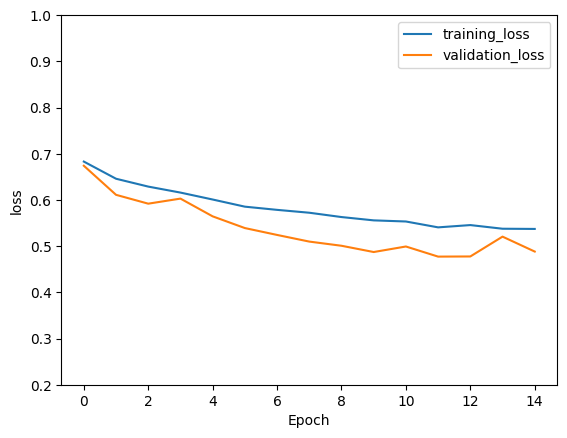

In [14]:

plot_learning_curve_loss(history.history, 0.2, 1)


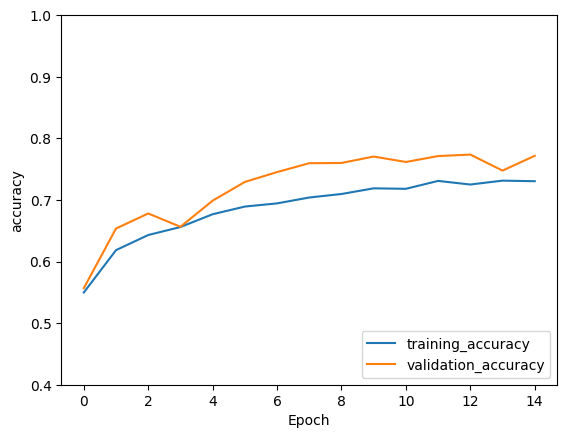

In [15]:
plot_learning_curve_metric(history.history, 0.4, 1)

In [310]:

for i in np.arange(0.00018, 0.00022, 0.000001):
    print(i)


0.00018
0.000181
0.000182
0.000183
0.000184
0.000185
0.000186
0.000187
0.000188
0.00018899999999999999
0.00018999999999999998
0.00019099999999999998
0.00019199999999999998
0.00019299999999999997
0.00019399999999999997
0.00019499999999999997
0.00019599999999999997
0.00019699999999999996
0.00019799999999999996
0.00019899999999999996
0.00019999999999999996
0.00020099999999999995
0.00020199999999999995
0.00020299999999999995
0.00020399999999999994
0.00020499999999999994
0.00020599999999999994
0.00020699999999999994
0.00020799999999999993
0.00020899999999999993
0.00020999999999999993
0.00021099999999999992
0.00021199999999999992
0.00021299999999999992
0.00021399999999999992
0.0002149999999999999
0.0002159999999999999
0.0002169999999999999
0.0002179999999999999
0.0002189999999999999



## Hyperparameter tuning step


In [321]:

def model_builder(hp):
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),    
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=hp.Float('learning_rate', min_value=0.00018, max_value=0.00022, step=0.000001))

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [322]:

def hp_tuning():
    import datetime
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    tuner = kt.BayesianOptimization(model_builder, objective='val_loss', max_trials=2, directory='hyperparameter_tuning', project_name='cats_vs_dogs_hp_tuning', overwrite=True) 
    train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)
    start_time = datetime.datetime.now()
    tuner.search(train_generator, validation_data=validation_generator, epochs=10, callbacks=[stop_early], verbose=1)
    end_time = datetime.datetime.now()
    print("Training time: ", end_time - start_time)
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    hypermodel = tuner.hypermodel.build(best_hps)
    return best_hps, hypermodel


In [323]:

best_hps, hypermodel = hp_tuning()


Trial 2 Complete [00h 12m 30s]
val_loss: 0.4276340901851654

Best val_loss So Far: 0.4276340901851654
Total elapsed time: 00h 24m 41s
Training time:  0:24:40.700768


In [351]:
hypermodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 64)       

In [324]:

for hp in best_hps.space:
  print(f"{hp.name}: {best_hps.get(hp.name)}")


learning_rate: 0.000185


In [359]:

def train_val_generators(TRAINING_DIR, TESTING_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                       rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode='nearest')


    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR, 
                                                        batch_size=128, class_mode='binary', target_size=(150, 150))
    # save_to_dir=/tmp/img-data-gen-outputs
    
    validation_datagen = ImageDataGenerator(rescale=1./255)
    
    validation_generator = validation_datagen.flow_from_directory(directory=TESTING_DIR, 
                                                                  batch_size=32, class_mode='binary', target_size=(150, 150))
    
    return train_generator, validation_generator

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

def hyperparameter_tuning(model_tuning_checkpoint, hypermodel):
    import datetime
    callbacks = myCallback()
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_tuning_checkpoint, monitor='loss', mode='min', save_best_only=True)
    
    train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)
    start_time = datetime.datetime.now()
    
    tuning_history = hypermodel.fit(train_generator, epochs=20, validation_data=validation_generator, verbose=1, callbacks=[callbacks, model_checkpoint])
    
    end_time = datetime.datetime.now()
    print("Training time: ", end_time - start_time)
    return tuning_history
    

In [360]:

model_tuning_checkpoint = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/cats_vs_dogs/conv2d_stacked_model_with_best_tuning_params.h5'

tuning_history = hyperparameter_tuning(model_tuning_checkpoint, hypermodel)


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/20
176/176 [==============================] - 77s 422ms/step - loss: 0.6789 - accuracy: 0.5624 - val_loss: 0.6404 - val_accuracy: 0.6320
Epoch 2/20
176/176 [==============================] - 73s 413ms/step - loss: 0.6517 - accuracy: 0.6224 - val_loss: 0.6229 - val_accuracy: 0.6584
Epoch 3/20
176/176 [==============================] - 72s 408ms/step - loss: 0.6207 - accuracy: 0.6541 - val_loss: 0.5670 - val_accuracy: 0.7160
Epoch 4/20
176/176 [==============================] - 73s 414ms/step - loss: 0.5958 - accuracy: 0.6842 - val_loss: 0.5315 - val_accuracy: 0.7372
Epoch 5/20
176/176 [==============================] - 72s 406ms/step - loss: 0.5818 - accuracy: 0.6926 - val_loss: 0.5305 - val_accuracy: 0.7372
Epoch 6/20
176/176 [==============================] - 72s 409ms/step - loss: 0.5573 - accuracy: 0.7150 - val_loss: 0.4947 - val_accuracy: 0.7736
Epoch 7/20
176/176 [=========================

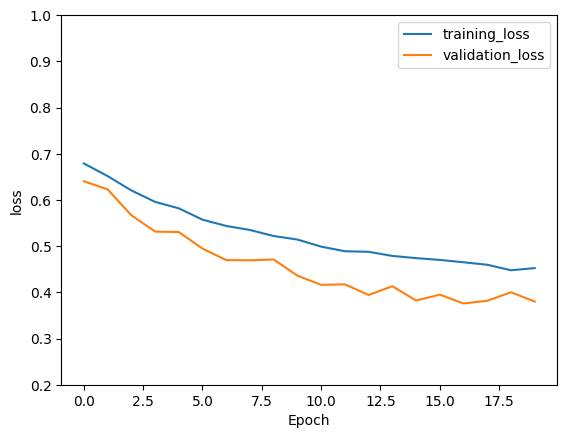

In [363]:

plot_learning_curve_loss(tuning_history.history, 0.2, 1)


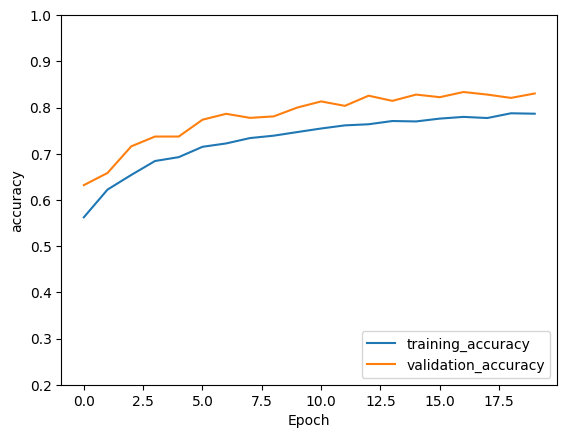

In [364]:


plot_learning_curve_metric(tuning_history.history, 0.2, 1)


# Summary

Aha the tuning process has achieved a good performance. It did not appear that especially when I had already tried using the learning_rate=0.00018. The final mdoel through the tuning process is saved and you have recorded the model architecture so good to go! Still not sure whether this is enough but at least I have saved it in case needed.




## Winning model architecture and the final one saved as: conv2d_stacked_model_with_best_tuning_params.h5


In [ ]:

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),    
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.000185),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [16]:

from tensorflow.keras.backend import clear_session
clear_session()
